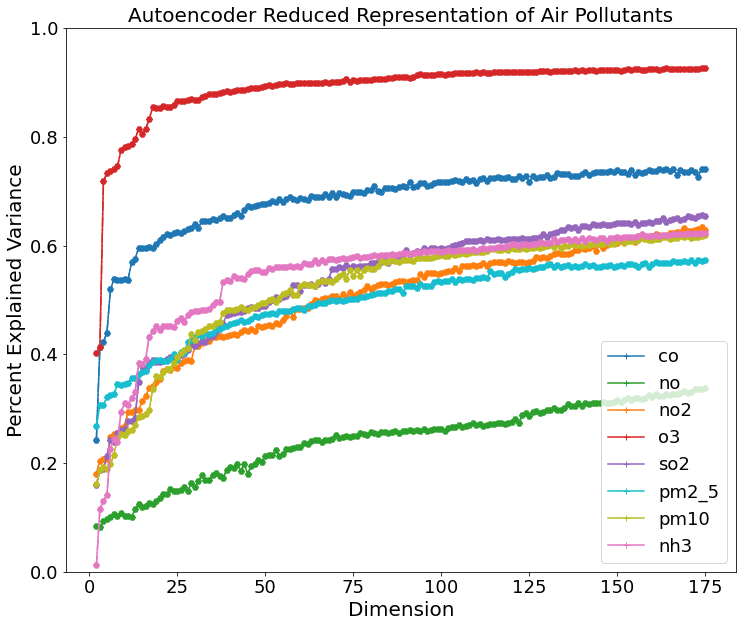

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



def linegraph(type, dims, component_names, colors_list):
    ''' 
    Plot the explained variance across dimensions using the model results
    @params:
        type: Type of reduction method, pca or autoencoders
        dims: Number of dimensions
        component_names: Gas/particulate list
        colors_list: List of colors to be used
    '''
    
    num_of_comp = list(range(2,dims+1))
    plt.figure(figsize=(12,10))
    plt.rc('axes', titlesize=20)    
    plt.rc('axes', labelsize=20)
    plt.rc('figure', titlesize=40)
    plt.rcParams.update({'font.size': 18})
    for i, component in enumerate(component_names):
        # AE or PCA
        if type == 'ae':
            file_name = 'C:\\Users\\Kurly\\Downloads\\Universal-Embeddings-testing\\Universal-Embeddings-Nick\\data\\{}_ae_results_grid_para.csv'.format(component)
            plt_title = 'Autoencoder Reduced Representation of Air Pollutants'
        elif type == 'pca':
            file_name = 'C:\\Users\\Kurly\\Downloads\\Universal-Embeddings-testing\\Universal-Embeddings-Nick\\data\\{}_pca_results.csv'.format(component)
            plt_title = 'PCA Reduced Representation of Air Pollutants'
        else:
            print('Type must be "ae" or "pca"')
            quit()

        # Read in model results
        model = pd.read_csv(filepath_or_buffer=file_name)
        variance = model['{}_var'.format(component)]
        r2 = model['{}_r2'.format(component)]
        
        # Plot results
        plt.plot(num_of_comp, variance[:dims-1], label = '{}'.format(component), linestyle = '-', marker = '+', color = colors_list[i])
        plt.plot(num_of_comp, r2[:dims-1], linestyle = '-.', marker = 'H', color = colors_list[i])
        plt.xlabel('Dimension')
        plt.ylabel('Percent Explained Variance')
        plt.title(plt_title)
        plt.legend()
        plt.ylim([0, 1])
    plt.show()


def scatter(type, component, color):
    '''
    Autoencoder scatter plot of multiple components for the first two dimensions
    @params:
        component: Name of gas or particulate
        color: Scatter plot color
    '''

    # Read in X_train values for first two dimensions from model results
    if type == 'ae':
        file_name = 'C:\\Users\\Kurly\\Downloads\\Universal-Embeddings-testing\\Universal-Embeddings-Nick\\data\\{}_ae_results_tanh.csv'.format(component)
    elif type == 'pca':
        file_name = 'C:\\Users\\Kurly\\Downloads\\Universal-Embeddings-testing\\Universal-Embeddings-Nick\\data\\{}_ae_results_tanh.csv'.format(component)
    else:
        print('Type must be "ae" or "pca"')
        quit()

    model = pd.read_csv(filepath_or_buffer=file_name)
    X_train = pd.DataFrame(data=model)
    X = X_train['{}_X_train_ax1'.format(component)]
    Y = X_train['{}_X_train_ax2'.format(component)]

    # Read in city data frame and select list of cities
    city_df = pd.read_csv(filepath_or_buffer='C:\\Users\\Kurly\\Downloads\\Universal-Embeddings-testing\\Universal-Embeddings-Nick\\data\\{}_data_clean.csv'.format(component))
    annotations = pd.DataFrame(data=city_df)
   
    # Read in whitelisted city data
    # Whitelist can be top200 cities or the outliers
    wlist_data = pd.read_csv(filepath_or_buffer='/home/nicks/github_repos/Pollution-Autoencoders/data/other/top200.csv')
    wlist = pd.DataFrame(data=wlist_data[:20])
    
    # Plot figure
    plt.figure(figsize=(14,14))
    plt.rcParams.update({'font.size': 18})
    plt.scatter(X, Y, label='{}'.format(component), c=color, alpha=0.1)

    size = len(X_train)
    plt.title('Carbon Monoxide Autoencoder in First Two Dimensions')
    '''
    # Annotate points (ad hoc)
    for i in range(size):
        for j in range(len(wlist)):
            if annotations.iloc[i][0] == wlist.iloc[j][0]:
                print(annotations.iloc[i][0])
                plt.annotate(text=annotations.iloc[i][0], xy=(X[i],Y[i]))
    '''
    plt.show()


def heatmap(component):
    # Read in component data and create an annotation list of cities
    data = pd.read_csv('/home/nicks/github_repos/Pollution-Autoencoders/data/data_clean/{}_data_clean.csv'.format(component))
    df = pd.DataFrame(data=data)
    annotations = df['city']

    # Read in whitelist of cities to graph
    wlist_data = pd.read_csv(filepath_or_buffer='/home/nicks/github_repos/Pollution-Autoencoders/data/other/outliers_whitelist.csv')
    wlist = pd.DataFrame(data=wlist_data[:10])
    
    # Remove lat/lon
    df.drop(['lat', 'lon'], 1, inplace=True) 

    # Time series data, city labels, and values list
    ts_list = []
    cities_list = []
    val_list = []
    total = 0
    
    # Loop through and find indexes of each city in data
    for i in range(len(annotations)):
        for w in range(len(wlist)):
            # Check if current city is in the whitelist
            if annotations.iloc[i] == wlist.iloc[w][0]:
                # Average for seven days
                for c in range(1, len(df.columns)):
                    total+=df.iloc[w][c]
                    if (c%7 == 0):   
                        weekly = round(total/7, 5)
                        ts_list.append(weekly)
                        total = 0
                # Update value and city name
                val_list.append(ts_list)
                cities_list.append(annotations.iloc[i])
                # Clear list for next iteration
                ts_list = []
    
    # Plot figure
    plt.rcParams.update({'font.size': 18})
    fig, ax = plt.subplots(figsize=(15,14))
    heat = ax.imshow(val_list, cmap='plasma')
    
    # Set axis width
    ax.set_xticks(np.arange(0, 27, 2)) # 27 weeks
    ax.set_yticks(np.arange(len(cities_list)))
    ax.set_yticklabels(cities_list)
    
    fig.colorbar(heat)
    plt.show()


### RUN ###

COMPONENT_NAMES = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
# COMPONENT_NAMES = ['co']
COLORS_LIST = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red', 'tab:purple', 'tab:cyan', 'tab:olive', 'tab:pink']
# Starting dimensions; Change this to edit
DIMS = 175

#scatter('ae', 'co', 'r')
# linegraph('pca', DIMS, COMPONENT_NAMES, COLORS_LIST)
linegraph('ae', DIMS, COMPONENT_NAMES, COLORS_LIST)
#heatmap(COMPONENT_NAMES[0])

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



def linegraph(type, dims, component_names, colors_list):
    ''' 
    Plot the explained variance across dimensions using the model results
    @params:
        type: Type of reduction method, pca or autoencoders
        dims: Number of dimensions
        component_names: Gas/particulate list
        colors_list: List of colors to be used
    '''
    
    num_of_comp = list(range(2,dims+1))
    plt.figure(figsize=(12,10))
    plt.rcParams.update({'font.size': 18})
    for i, component in enumerate(component_names):
        # AE or PCA
        if type == 'ae':
            file_name = 'C:\\Users\\Kurly\\Downloads\\Universal-Embeddings-testing\\Universal-Embeddings-Nick\\data\\{}_ae_results_LReLU.csv'.format(component)
            plt_title = 'Autoencoder of Polluting Gases'
        elif type == 'pca':
            file_name = 'C:\\Users\\Kurly\\Downloads\\Universal-Embeddings-testing\\Universal-Embeddings-Nick\\data\\{}_ae_results_LReLU.csv'.format(component)
            plt_title = 'PCA of Polluting Gases'
        else:
            print('Type must be "ae" or "pca"')
            quit()

        # Read in model results
        model = pd.read_csv(filepath_or_buffer=file_name)
        variance = model['{}_var'.format(component)]
        r2 = model['{}_r2'.format(component)]
        
        # Plot results
        plt.plot(num_of_comp, variance[:dims-1], label = '{}'.format(component), linestyle = '-', marker = '+', color = colors_list[i])
        plt.plot(num_of_comp, r2[:dims-1], linestyle = '-.', marker = 'H', color = colors_list[i])
        plt.xlabel('Dimension')
        plt.ylabel('% Explained Variance')
        plt.title(plt_title)
        
    plt.show()


def scatter(type, component, color):
    '''
    Autoencoder scatter plot of multiple components for the first two dimensions
    @params:
        component: Name of gas or particulate
        color: Scatter plot color
    '''

    # Read in X_train values for first two dimensions from model results
    if type == 'ae':
        file_name = 'C:\\Users\\Kurly\\Downloads\\Universal-Embeddings-testing\\Universal-Embeddings-Nick\\data\\{}_ae_results_tanh.csv'.format(component)
    elif type == 'pca':
        file_name = 'C:\\Users\\Kurly\\Downloads\\Universal-Embeddings-testing\\Universal-Embeddings-Nick\\data\\{}_ae_results_tanh.csv'.format(component)
    else:
        print('Type must be "ae" or "pca"')
        quit()

    model = pd.read_csv(filepath_or_buffer=file_name)
    X_train = pd.DataFrame(data=model)
    X = X_train['{}_X_train_ax1'.format(component)]
    Y = X_train['{}_X_train_ax2'.format(component)]

    # Read in city data frame and select list of cities
    city_df = pd.read_csv(filepath_or_buffer='C:\\Users\\Kurly\\Downloads\\Universal-Embeddings-testing\\Universal-Embeddings-Nick\\data\\{}_data_clean.csv'.format(component))
    annotations = pd.DataFrame(data=city_df)
   
    # Read in whitelisted city data
    # Whitelist can be top200 cities or the outliers
    wlist_data = pd.read_csv(filepath_or_buffer='/home/nicks/github_repos/Pollution-Autoencoders/data/other/top200.csv')
    wlist = pd.DataFrame(data=wlist_data[:20])
    
    # Plot figure
    plt.figure(figsize=(14,14))
    plt.rcParams.update({'font.size': 18})
    plt.scatter(X, Y, label='{}'.format(component), c=color, alpha=0.1)

    size = len(X_train)
    plt.title('Carbon Monoxide Autoencoder in First Two Dimensions')
    '''
    # Annotate points (ad hoc)
    for i in range(size):
        for j in range(len(wlist)):
            if annotations.iloc[i][0] == wlist.iloc[j][0]:
                print(annotations.iloc[i][0])
                plt.annotate(text=annotations.iloc[i][0], xy=(X[i],Y[i]))
    '''
    plt.show()


def heatmap(component):
    # Read in component data and create an annotation list of cities
    data = pd.read_csv('/home/nicks/github_repos/Pollution-Autoencoders/data/data_clean/{}_data_clean.csv'.format(component))
    df = pd.DataFrame(data=data)
    annotations = df['city']

    # Read in whitelist of cities to graph
    wlist_data = pd.read_csv(filepath_or_buffer='/home/nicks/github_repos/Pollution-Autoencoders/data/other/outliers_whitelist.csv')
    wlist = pd.DataFrame(data=wlist_data[:10])
    
    # Remove lat/lon
    df.drop(['lat', 'lon'], 1, inplace=True) 

    # Time series data, city labels, and values list
    ts_list = []
    cities_list = []
    val_list = []
    total = 0
    
    # Loop through and find indexes of each city in data
    for i in range(len(annotations)):
        for w in range(len(wlist)):
            # Check if current city is in the whitelist
            if annotations.iloc[i] == wlist.iloc[w][0]:
                # Average for seven days
                for c in range(1, len(df.columns)):
                    total+=df.iloc[w][c]
                    if (c%7 == 0):   
                        weekly = round(total/7, 5)
                        ts_list.append(weekly)
                        total = 0
                # Update value and city name
                val_list.append(ts_list)
                cities_list.append(annotations.iloc[i])
                # Clear list for next iteration
                ts_list = []
    
    # Plot figure
    plt.rcParams.update({'font.size': 18})
    fig, ax = plt.subplots(figsize=(15,14))
    heat = ax.imshow(val_list, cmap='plasma')
    
    # Set axis width
    ax.set_xticks(np.arange(0, 27, 2)) # 27 weeks
    ax.set_yticks(np.arange(len(cities_list)))
    ax.set_yticklabels(cities_list)
    
    fig.colorbar(heat)
    plt.show()


### RUN ###

#COMPONENT_NAMES = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
COMPONENT_NAMES = ['co']
COLORS_LIST = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red', 'tab:purple', 'tab:cyan', 'tab:olive', 'tab:pink']
# Starting dimensions; Change this to edit
DIMS = 190

#scatter('ae', 'co', 'r')
#linegraph('pca', DIMS, COMPONENT_NAMES, COLORS_LIST)
linegraph('ae', DIMS, COMPONENT_NAMES, COLORS_LIST)
#heatmap(COMPONENT_NAMES[0])

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Kurly\\Downloads\\Universal-Embeddings-testing\\Universal-Embeddings-Nick\\data\\co_ae_results_LReLU.csv'

<Figure size 864x720 with 0 Axes>

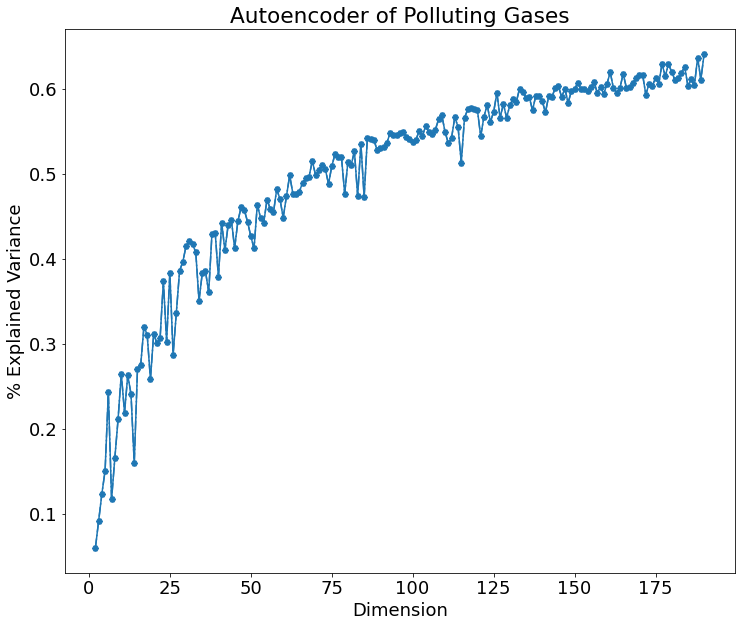

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



def linegraph(type, dims, component_names, colors_list):
    ''' 
    Plot the explained variance across dimensions using the model results
    @params:
        type: Type of reduction method, pca or autoencoders
        dims: Number of dimensions
        component_names: Gas/particulate list
        colors_list: List of colors to be used
    '''
    
    num_of_comp = list(range(2,dims+1))
    plt.figure(figsize=(12,10))
    plt.rcParams.update({'font.size': 18})
    for i, component in enumerate(component_names):
        # AE or PCA
        if type == 'ae':
            file_name = 'C:\\Users\\Kurly\\Downloads\\Universal-Embeddings-testing\\Universal-Embeddings-Nick\\data\\{}_ae_results_LReLU_LR_0.1_100batch.csv'.format(component)
            plt_title = 'Autoencoder of Polluting Gases'
        elif type == 'pca':
            file_name = 'C:\\Users\\Kurly\\Downloads\\Universal-Embeddings-testing\\Universal-Embeddings-Nick\\data\\{}_ae_results_LReLU.csv'.format(component)
            plt_title = 'PCA of Polluting Gases'
        else:
            print('Type must be "ae" or "pca"')
            quit()

        # Read in model results
        model = pd.read_csv(filepath_or_buffer=file_name)
        variance = model['{}_var'.format(component)]
        r2 = model['{}_r2'.format(component)]
        
        # Plot results
        plt.plot(num_of_comp, variance[:dims-1], label = '{}'.format(component), linestyle = '-', marker = '+', color = colors_list[i])
        plt.plot(num_of_comp, r2[:dims-1], linestyle = '-.', marker = 'H', color = colors_list[i])
        plt.xlabel('Dimension')
        plt.ylabel('% Explained Variance')
        plt.title(plt_title)
        
    plt.show()


def scatter(type, component, color):
    '''
    Autoencoder scatter plot of multiple components for the first two dimensions
    @params:
        component: Name of gas or particulate
        color: Scatter plot color
    '''

    # Read in X_train values for first two dimensions from model results
    if type == 'ae':
        file_name = 'C:\\Users\\Kurly\\Downloads\\Universal-Embeddings-testing\\Universal-Embeddings-Nick\\data\\{}_ae_results_tanh.csv'.format(component)
    elif type == 'pca':
        file_name = 'C:\\Users\\Kurly\\Downloads\\Universal-Embeddings-testing\\Universal-Embeddings-Nick\\data\\{}_ae_results_tanh.csv'.format(component)
    else:
        print('Type must be "ae" or "pca"')
        quit()

    model = pd.read_csv(filepath_or_buffer=file_name)
    X_train = pd.DataFrame(data=model)
    X = X_train['{}_X_train_ax1'.format(component)]
    Y = X_train['{}_X_train_ax2'.format(component)]

    # Read in city data frame and select list of cities
    city_df = pd.read_csv(filepath_or_buffer='C:\\Users\\Kurly\\Downloads\\Universal-Embeddings-testing\\Universal-Embeddings-Nick\\data\\{}_data_clean.csv'.format(component))
    annotations = pd.DataFrame(data=city_df)
   
    # Read in whitelisted city data
    # Whitelist can be top200 cities or the outliers
    wlist_data = pd.read_csv(filepath_or_buffer='/home/nicks/github_repos/Pollution-Autoencoders/data/other/top200.csv')
    wlist = pd.DataFrame(data=wlist_data[:20])
    
    # Plot figure
    plt.figure(figsize=(14,14))
    plt.rcParams.update({'font.size': 18})
    plt.scatter(X, Y, label='{}'.format(component), c=color, alpha=0.1)

    size = len(X_train)
    plt.title('Carbon Monoxide Autoencoder in First Two Dimensions')
    '''
    # Annotate points (ad hoc)
    for i in range(size):
        for j in range(len(wlist)):
            if annotations.iloc[i][0] == wlist.iloc[j][0]:
                print(annotations.iloc[i][0])
                plt.annotate(text=annotations.iloc[i][0], xy=(X[i],Y[i]))
    '''
    plt.show()


def heatmap(component):
    # Read in component data and create an annotation list of cities
    data = pd.read_csv('/home/nicks/github_repos/Pollution-Autoencoders/data/data_clean/{}_data_clean.csv'.format(component))
    df = pd.DataFrame(data=data)
    annotations = df['city']

    # Read in whitelist of cities to graph
    wlist_data = pd.read_csv(filepath_or_buffer='/home/nicks/github_repos/Pollution-Autoencoders/data/other/outliers_whitelist.csv')
    wlist = pd.DataFrame(data=wlist_data[:10])
    
    # Remove lat/lon
    df.drop(['lat', 'lon'], 1, inplace=True) 

    # Time series data, city labels, and values list
    ts_list = []
    cities_list = []
    val_list = []
    total = 0
    
    # Loop through and find indexes of each city in data
    for i in range(len(annotations)):
        for w in range(len(wlist)):
            # Check if current city is in the whitelist
            if annotations.iloc[i] == wlist.iloc[w][0]:
                # Average for seven days
                for c in range(1, len(df.columns)):
                    total+=df.iloc[w][c]
                    if (c%7 == 0):   
                        weekly = round(total/7, 5)
                        ts_list.append(weekly)
                        total = 0
                # Update value and city name
                val_list.append(ts_list)
                cities_list.append(annotations.iloc[i])
                # Clear list for next iteration
                ts_list = []
    
    # Plot figure
    plt.rcParams.update({'font.size': 18})
    fig, ax = plt.subplots(figsize=(15,14))
    heat = ax.imshow(val_list, cmap='plasma')
    
    # Set axis width
    ax.set_xticks(np.arange(0, 27, 2)) # 27 weeks
    ax.set_yticks(np.arange(len(cities_list)))
    ax.set_yticklabels(cities_list)
    
    fig.colorbar(heat)
    plt.show()


### RUN ###

#COMPONENT_NAMES = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
COMPONENT_NAMES = ['no2']
COLORS_LIST = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red', 'tab:purple', 'tab:cyan', 'tab:olive', 'tab:pink']
# Starting dimensions; Change this to edit
DIMS = 190

#scatter('ae', 'co', 'r')
#linegraph('pca', DIMS, COMPONENT_NAMES, COLORS_LIST)
linegraph('ae', DIMS, COMPONENT_NAMES, COLORS_LIST)
#heatmap(COMPONENT_NAMES[0])

Houston
LosAngeles
Chicago
Philadelphia
Houston
Phoenix
Philadelphia
Phoenix
Houston


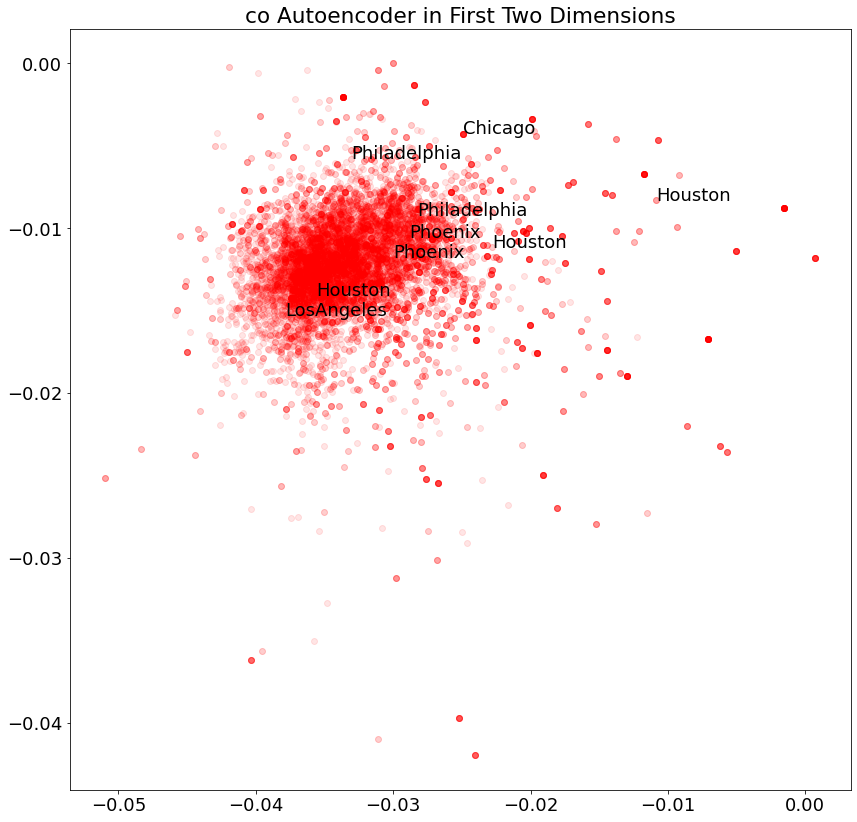

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



def linegraph(type, dims, component_names, colors_list):
    ''' 
    Plot the explained variance across dimensions using the model results
    @params:
        type: Type of reduction method, pca or autoencoders
        dims: Number of dimensions
        component_names: Gas/particulate list
        colors_list: List of colors to be used
    '''
    
    num_of_comp = list(range(2,dims+1))
    plt.figure(figsize=(12,10))
    plt.rcParams.update({'font.size': 18})
    for i, component in enumerate(component_names):
        # AE or PCA
        if type == 'ae':
            file_name = 'C:\\Users\\Kurly\\Downloads\\Universal-Embeddings-testing\\Universal-Embeddings-Nick\\data\\{}_ae_results_grid_para.csv'.format(component)
            plt_title = 'Autoencoder of Polluting Gases'
        elif type == 'pca':
            file_name = 'C:\\Users\\Kurly\\Downloads\\Universal-Embeddings-testing\\Universal-Embeddings-Nick\\data\\{}_ae_results_grid_para.csv'.format(component)
            plt_title = 'PCA of Polluting Gases'
        else:
            print('Type must be "ae" or "pca"')
            quit()

        # Read in model results
        model = pd.read_csv(filepath_or_buffer=file_name)
        variance = model['{}_var'.format(component)]
        r2 = model['{}_r2'.format(component)]
        
        # Plot results
        plt.plot(num_of_comp, variance[:dims-1], label = '{}'.format(component), linestyle = '-', marker = '+', color = colors_list[i])
        plt.plot(num_of_comp, r2[:dims-1], linestyle = '-.', marker = 'H', color = colors_list[i])
        plt.xlabel('Dimension')
        plt.ylabel('% Explained Variance')
        plt.title(plt_title)
        
    plt.show()


def scatter(type, component, color):
    '''
    Autoencoder scatter plot of multiple components for the first two dimensions
    @params:
        component: Name of gas or particulate
        color: Scatter plot color
    '''

    # Read in X_train values for first two dimensions from model results
    if type == 'ae':
        file_name = 'C:\\Users\\Kurly\\Downloads\\Universal-Embeddings-testing\\Universal-Embeddings-Nick\\data\\{}_ae_results_grid_para.csv'.format(component)
    elif type == 'pca':
        file_name = 'C:\\Users\\Kurly\\Downloads\\Universal-Embeddings-testing\\Universal-Embeddings-Nick\\data\\{}_ae_results_grid_para.csv'.format(component)
    else:
        print('Type must be "ae" or "pca"')
        quit()

    model = pd.read_csv(filepath_or_buffer=file_name)
    X_train = pd.DataFrame(data=model)
    X = X_train['{}_X_train_ax1'.format(component)]
    Y = X_train['{}_X_train_ax2'.format(component)]

    # Read in city data frame and select list of cities
    city_df = pd.read_csv(filepath_or_buffer='C:\\Users\\Kurly\\Downloads\\Universal-Embeddings-testing\\Universal-Embeddings-Nick\\data\\{}_data_clean.csv'.format(component))
    annotations = pd.DataFrame(data=city_df)
   
    # Read in whitelisted city data
    # Whitelist can be top200 cities or the outliers
    wlist_data = pd.read_csv(filepath_or_buffer='C:\\Users\\Kurly\\Downloads\\Universal-Embeddings-testing\\Universal-Embeddings-Nick\\data\\top200.csv')
    wlist = pd.DataFrame(data=wlist_data[:5])
    
    # Plot figure
    plt.figure(figsize=(14,14))
    plt.rcParams.update({'font.size': 18})
    plt.scatter(X, Y, label='{}'.format(component), c=color, alpha=0.1)

    size = len(X_train)
    plt.title('{} Autoencoder in First Two Dimensions'.format(component))
    
    # Annotate points (ad hoc)
    for i in range(size):
        for j in range(len(wlist)):
            if annotations.iloc[i][0] == wlist.iloc[j][0]:
                print(annotations.iloc[i][0])
                plt.annotate(text=annotations.iloc[i][0], xy=(X[i],Y[i]))
    
    plt.show()


def heatmap(component):
    # Read in component data and create an annotation list of cities
    data = pd.read_csv('/home/nicks/github_repos/Pollution-Autoencoders/data/data_clean/{}_data_clean.csv'.format(component))
    df = pd.DataFrame(data=data)
    annotations = df['city']

    # Read in whitelist of cities to graph
    wlist_data = pd.read_csv(filepath_or_buffer='/home/nicks/github_repos/Pollution-Autoencoders/data/other/outliers_whitelist.csv')
    wlist = pd.DataFrame(data=wlist_data[:10])
    
    # Remove lat/lon
    df.drop(['lat', 'lon'], 1, inplace=True) 

    # Time series data, city labels, and values list
    ts_list = []
    cities_list = []
    val_list = []
    total = 0
    
    # Loop through and find indexes of each city in data
    for i in range(len(annotations)):
        for w in range(len(wlist)):
            # Check if current city is in the whitelist
            if annotations.iloc[i] == wlist.iloc[w][0]:
                # Average for seven days
                for c in range(1, len(df.columns)):
                    total+=df.iloc[w][c]
                    if (c%7 == 0):   
                        weekly = round(total/7, 5)
                        ts_list.append(weekly)
                        total = 0
                # Update value and city name
                val_list.append(ts_list)
                cities_list.append(annotations.iloc[i])
                # Clear list for next iteration
                ts_list = []
    
    # Plot figure
    plt.rcParams.update({'font.size': 18})
    fig, ax = plt.subplots(figsize=(15,14))
    heat = ax.imshow(val_list, cmap='plasma')
    
    # Set axis width
    ax.set_xticks(np.arange(0, 27, 2)) # 27 weeks
    ax.set_yticks(np.arange(len(cities_list)))
    ax.set_yticklabels(cities_list)
    
    fig.colorbar(heat)
    plt.show()


### RUN ###

#COMPONENT_NAMES = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
COMPONENT_NAMES = ['all']
COLORS_LIST = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red', 'tab:purple', 'tab:cyan', 'tab:olive', 'tab:pink']
# Starting dimensions; Change this to edit
DIMS = 2535

scatter('ae', 'co', 'r')
#linegraph('pca', DIMS, COMPONENT_NAMES, COLORS_LIST)
# linegraph('ae', DIMS, COMPONENT_NAMES, COLORS_LIST)
#heatmap(COMPONENT_NAMES[0])